# Project Template

A guide for applying machine learning on a dataset.

## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [1]:
# Pandas for managing datasets
import pandas as pd
from matplotlib import pyplot as plt
import operator
%matplotlib inline
from sklearn.datasets import load_boston
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
#Data Preparation
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
#Algorithm Selection|
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
#Model Training
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from time import time
from scipy.stats import randint as sp_randint
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
boston = load_boston()
df = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns= boston['feature_names'].tolist() + ['target'])
names=df.columns
X = np.array(boston.data)
Y = np.array(boston.target)
print df.describe

<bound method DataFrame.describe of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87  

## Step 2: Define Problem
Our task is to find the best regression algorithm for the boston housing dataset.For this exercise,the target column is going to be the MEDV column(14th) as we would like to estimate the value of a house in Boston.

## Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

### 3.1 Take a peek of our data


### Does the data make sense?¶

    Do the columns make sense?
        The columns of the dataset consist of :
        1. CRIM      per capita crime rate by town
        2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS     proportion of non-retail business acres per town
        4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX       nitric oxides concentration (parts per 10 million)
        6. RM        average number of rooms per dwelling
        7. AGE       proportion of owner-occupied units built prior to 1940
        8. DIS       weighted distances to five Boston employment centres
        9. RAD       index of accessibility to radial highways
        10. TAX      full-value property-tax rate per 10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacksby town
        13. LSTAT lower status of the population
    Do the values in columns make sense?
        As we can see,the values do make sense(no negative values and in a reange according to the perspective of each attribute(eg criminality rate is between 0-100%).
    Is there missing data?
        There are no missing data on the dataset.(df.isnull().values.any() returns false)

### Dimensions of the data

Answer basic questions about the dataset:

    What is the shape of your data?
    Shape of data is 506 rows with 14 columns.506 houses with 14 attributes.
    We can say that the we have a small number of observations.



In [3]:
for ind in range (len(boston.feature_names)):
    print boston.feature_names[ind],' has a minimum-maximum value of:',X[:,ind].min(),"-",X[:,ind].max()
print "Target variable has a minimum-maximum value of:",Y.min(),"-",Y.max()

CRIM  has a minimum-maximum value of: 0.00632 - 88.9762
ZN  has a minimum-maximum value of: 0.0 - 100.0
INDUS  has a minimum-maximum value of: 0.46 - 27.74
CHAS  has a minimum-maximum value of: 0.0 - 1.0
NOX  has a minimum-maximum value of: 0.385 - 0.871
RM  has a minimum-maximum value of: 3.561 - 8.78
AGE  has a minimum-maximum value of: 2.9 - 100.0
DIS  has a minimum-maximum value of: 1.1296 - 12.1265
RAD  has a minimum-maximum value of: 1.0 - 24.0
TAX  has a minimum-maximum value of: 187.0 - 711.0
PTRATIO  has a minimum-maximum value of: 12.6 - 22.0
B  has a minimum-maximum value of: 0.32 - 396.9
LSTAT  has a minimum-maximum value of: 1.73 - 37.97
Target variable has a minimum-maximum value of: 5.0 - 50.0


In [4]:
print 'Shape is ',df.shape
print "Are there any null values?",df.isnull().values.any()

Shape is  (506, 14)
Are there any null values? False


### Data Type of Each Attribute

What are the data types?
        Numeric? Categorical?



In [5]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object


### Do we have a target variable?
Target variable is the target attribute.



In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### 3.2 Descriptive Statistics


### describe() returns 8 statistical properties for each attribute

    Count: how many values the attribute has
    Mean: the mean of all values of the attribute
    Standard Deviation: the amount of variation values have. Low $\sigma$ means values are closer to the mean
    Minimum value
    25th Percentile: the value under which 25% of the instances can be found
    50th Percentile: the value under which 50% of the instances can be found (also called the median, is the value that splits the distribution in half)
    75th Percentile: the value under which 75% of the instances can be found
    Maximum value



In [8]:
pd.set_option('precision', 3)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.594,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.597,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.647,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


### Correlation between attributes

Correlation refers to the relationship between two variables and how they may or may not change together. A correlation of -1 or 1 shows a full negative or positive correlation respectively(correlation>0 means that if one variable increases the other also increases and correlation<0 means that when variable decreases the other also decreases). Whereas a value of 0 shows no correlation at all.
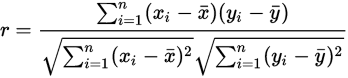
We can see from our dataset that [NOX/INDUSCHAS],[INDUS/DIS],[NOX/AGE],[NOX/DIS],[AGE/DIS],[RAD/TAX],[LSTAT/target]and [INDUS/TAX] have a high correllation.

In [9]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000,-0.199,0.404,-0.055,0.418,-0.220,0.351,-0.378,0.622,0.580,0.288,-0.377,0.452,-0.386
ZN,-0.199,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.404,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.055,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.418,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.220,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.351,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.378,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.622,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.580,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


### Skew of Univariate Distributions
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined.
 With negative skew the mass of the distribution is concentrated on the right while with a positive skew the mass of the distribution is concentrated on the left .

Positive skewness have the attributes (CRIM,ZN,CHAS,NOX,DIS,RAD,TAX,LSTAT) ,negative skewness have the attribute(B) INDUS,RM,PTRATIO,AGE have skewness close to 0 ,which means they are normally distributed around the mean value.

In [10]:
df.skew()

CRIM       5.238
ZN         2.226
INDUS      0.295
CHAS       3.406
NOX        0.729
RM         0.404
AGE       -0.599
DIS        1.012
RAD        1.005
TAX        0.670
PTRATIO   -0.802
B         -2.890
LSTAT      0.906
target     1.108
dtype: float64

### 3.3 Descriptive Statistics

### Summarise distributions of numeric features
We are going to use histograms

The CRIM=3.594,ZN=11.364,CHAS=0.069,NOX=0.555,DIS=3.795,RAD=9.549,TAX=408.237,LSTAT=12.653 the mass of the distribution is concentrated on the right,whereas B=356.674 the mass of the distribution is concentrated on the left.INDUS=11.137,RM=6.285,PTRATIO=18.456,AGE=68.575 have normally distributed their values around mean value.

/home/mscuser/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mscuser/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


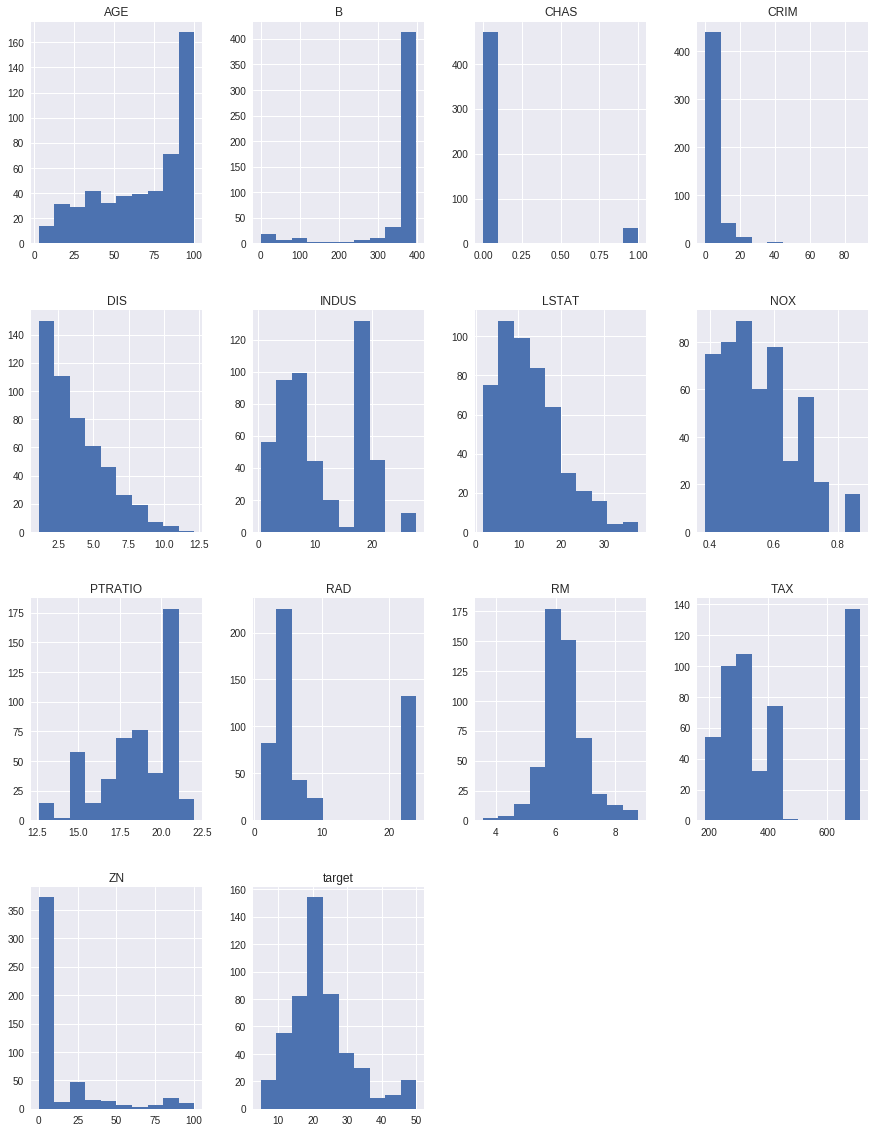

In [11]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax=ax)
fig.show()
#In order to make the histograms bigger.

### Density Plots
CRIM,ZN,CHAS,RM,DIS,LSTAT have a more normalise distribution,whereas the values of INDUS,TAX,PTRATIO,AGE,NOX,RAD are more random.

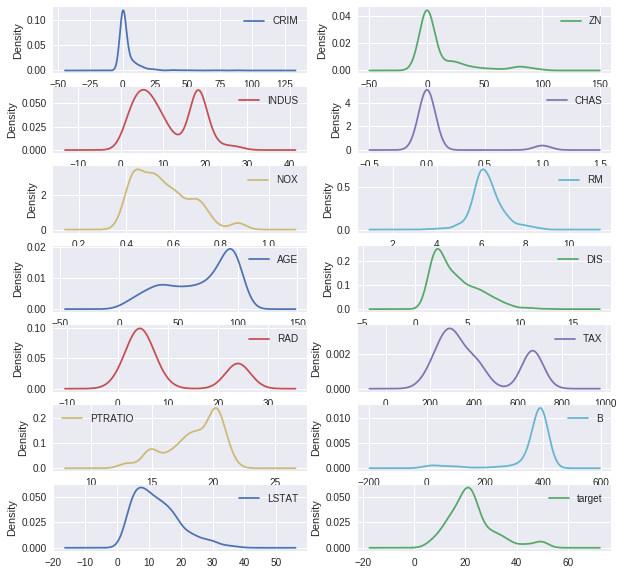

In [12]:
df.plot(kind='density', subplots=True, layout=(7,2), sharex=False,figsize=(10,10))
plt.show()

### Box plots
Box plot can be summarised to the following:
![image.png](attachment:image.png)


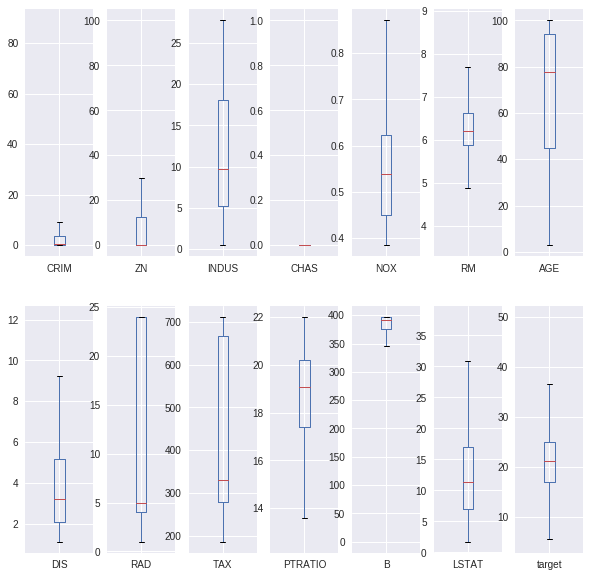

In [13]:
bp = df.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False,figsize=(10,10))

plt.show()

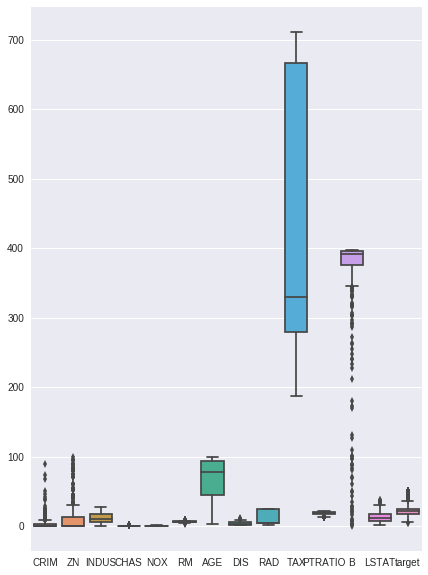

In [14]:
f = plt.figure(figsize=(7,10))
sns.boxplot(data=df)

### Correlation Matrix
The darker the box gets,the more correlated the two attributes are.

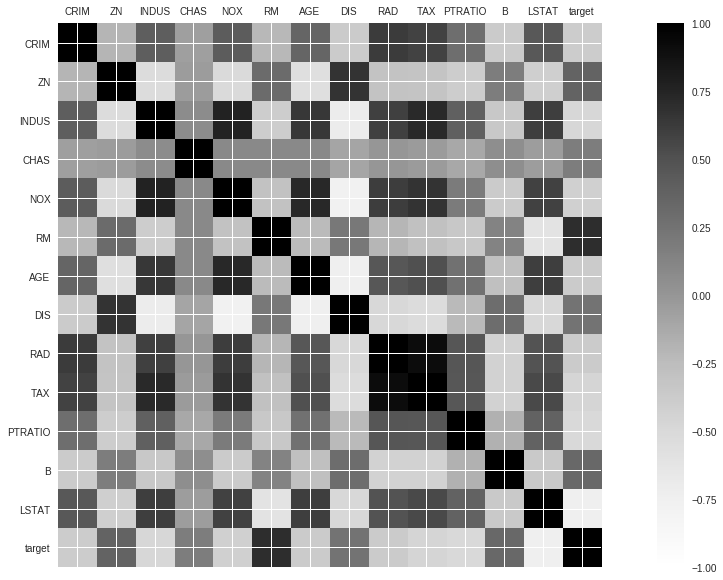

In [15]:
correlations = df.corr()
# plot correlation matrix
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

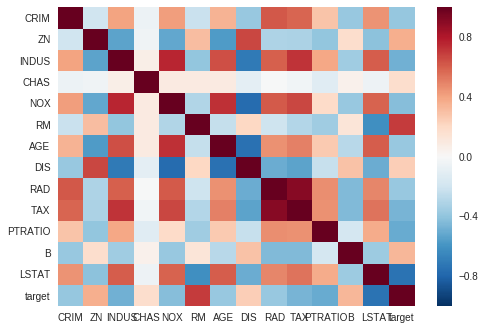

In [16]:
sns.heatmap(correlations)

### Scatter plots
Scatter plots are useful for spotting structured relationships between variables, like whether you could summarise the relationship between two variables with a line


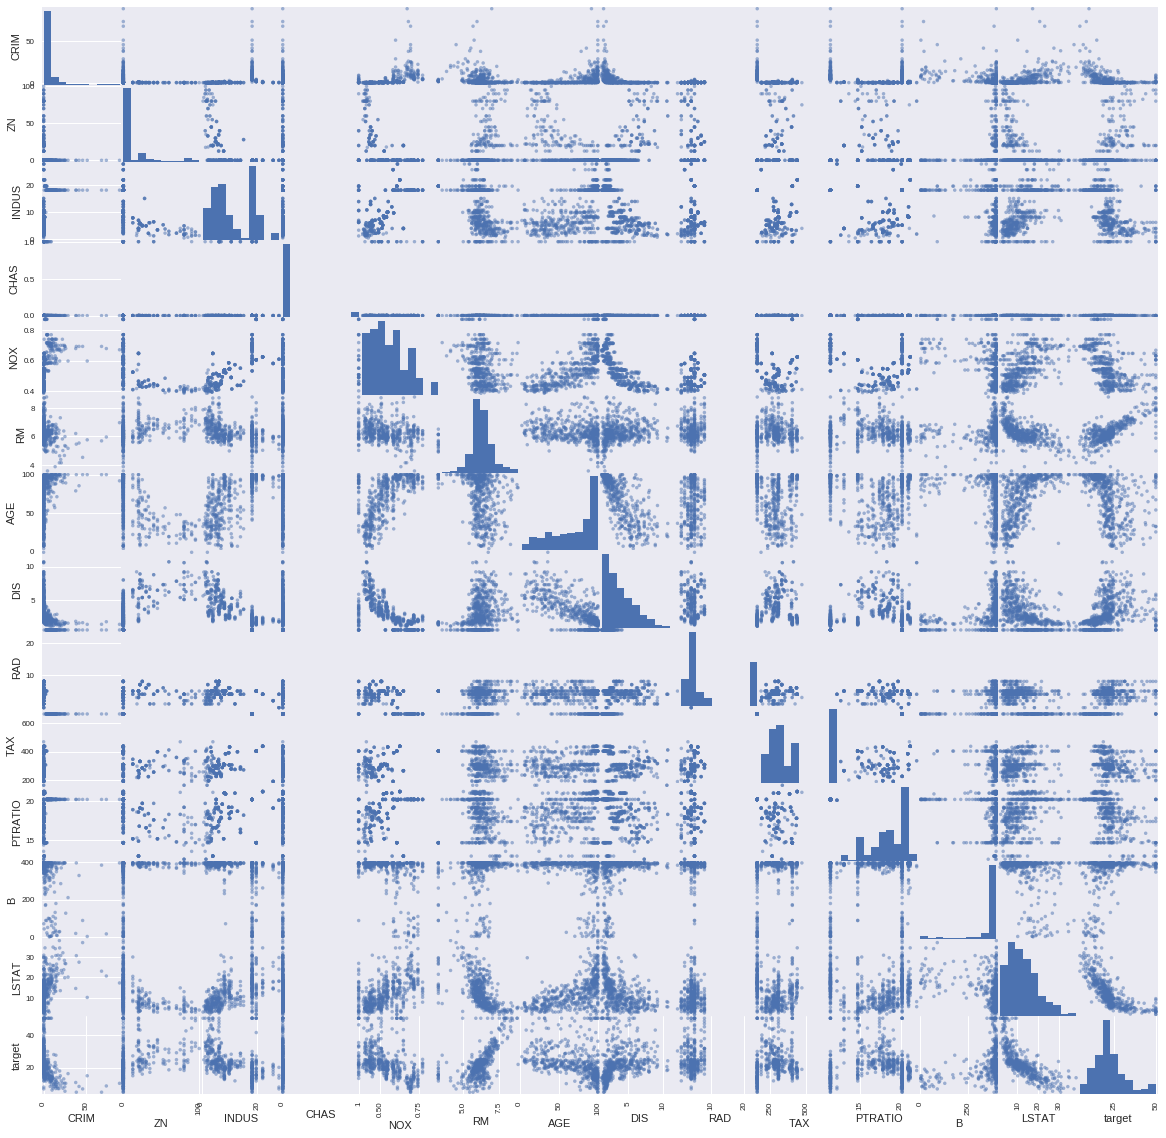

In [17]:
scatter_matrix(df,figsize=(20,20))
fig.show()

## Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).

### Rescale Data
Rescaling data is multiplying each member of a data set by a constant.The rescaled data have a value between 0 and 1.Rescaling will change the spread of your data as well as the position of your data points. What remains unchanged is the shape of distribution and the relative attributes of our curve. 

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
set_printoptions(precision=3)
print(X[0:5,:])

[[  0.000e+00   1.800e-01   6.782e-02   0.000e+00   3.148e-01   5.775e-01
    6.416e-01   2.692e-01   0.000e+00   2.080e-01   2.872e-01   1.000e+00
    8.968e-02]
 [  2.359e-04   0.000e+00   2.423e-01   0.000e+00   1.728e-01   5.480e-01
    7.827e-01   3.490e-01   4.348e-02   1.050e-01   5.532e-01   1.000e+00
    2.045e-01]
 [  2.357e-04   0.000e+00   2.423e-01   0.000e+00   1.728e-01   6.944e-01
    5.994e-01   3.490e-01   4.348e-02   1.050e-01   5.532e-01   9.897e-01
    6.347e-02]
 [  2.928e-04   0.000e+00   6.305e-02   0.000e+00   1.502e-01   6.586e-01
    4.418e-01   4.485e-01   8.696e-02   6.679e-02   6.489e-01   9.943e-01
    3.339e-02]
 [  7.051e-04   0.000e+00   6.305e-02   0.000e+00   1.502e-01   6.871e-01
    5.283e-01   4.485e-01   8.696e-02   6.679e-02   6.489e-01   1.000e+00
    9.934e-02]]


### Standardise Data
A standardized value is what you get when you take a data point and scale it by population data.

In [19]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(X[0:5,:])

[[-0.418  0.285 -1.288 -0.273 -0.144  0.414 -0.12   0.14  -0.983 -0.667
  -1.459  0.441 -1.076]
 [-0.415 -0.488 -0.593 -0.273 -0.74   0.194  0.367  0.557 -0.868 -0.987
  -0.303  0.441 -0.492]
 [-0.415 -0.488 -0.593 -0.273 -0.74   1.283 -0.266  0.557 -0.868 -0.987
  -0.303  0.396 -1.209]
 [-0.415 -0.488 -1.307 -0.273 -0.835  1.016 -0.81   1.078 -0.753 -1.106
   0.113  0.416 -1.362]
 [-0.41  -0.488 -1.307 -0.273 -0.835  1.229 -0.511  1.078 -0.753 -1.106
   0.113  0.441 -1.027]]


### Normalise Data (length = 1)

In [20]:
scaler = Normalizer().fit(X)
rescaledX = scaler.transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-0.157  0.107 -0.483 -0.102 -0.054  0.155 -0.045  0.053 -0.369 -0.25
  -0.547  0.165 -0.404]
 [-0.204 -0.24  -0.292 -0.134 -0.364  0.096  0.181  0.274 -0.427 -0.486
  -0.149  0.217 -0.242]
 [-0.159 -0.186 -0.227 -0.104 -0.283  0.49  -0.102  0.213 -0.332 -0.377
  -0.116  0.151 -0.462]
 [-0.134 -0.158 -0.422 -0.088 -0.27   0.329 -0.262  0.348 -0.243 -0.358
   0.037  0.135 -0.44 ]
 [-0.138 -0.164 -0.439 -0.092 -0.28   0.413 -0.172  0.362 -0.253 -0.371
   0.038  0.148 -0.345]]


## Step 5: Feature Engineering
Feature selection/feture engineering (as in new features)/data transformations.

A feature is an attribute or property shared by all of the independent units on which analysis or prediction is to be done. Any attribute could be a feature, as long as it is useful to the model.
The purpose of a feature, other than being an attribute, would be much easier to understand in the context of a problem. A feature is a characteristic that might help when solving the problem.
The features in our data are important to the predictive models you use and will influence the results we are going to achieve. The quality and quantity of the features will have great influence on whether the model is good or not.You could say the better the features are, the better the result is. This isn't entirely true, because the results achieved also depend on the model and the data, not just the chosen features. That said, choosing the right features is still very important. Better features can produce simpler and more flexible models, and they often yield better results

## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

### 6.1 Algorithm Selection

In [21]:
kfold = KFold(n_splits=10, random_state=7)
x,x_test,y,y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


### Linear Regression

In [22]:
results = cross_val_score(LinearRegression(), x, y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean()) ;# prints the (minus) mean squared error

-21.3969079715


### Ridge Regression

In [23]:
results = cross_val_score(Ridge(), x, y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean()) ;# prints the (minus) mean squared error

-21.3804890393


### k-Nearest Neighbors

In [24]:
results = cross_val_score(KNeighborsRegressor(), x, y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean()) ;# prints the (minus) mean squared error

-18.7015013171


### Lasso Regression

In [25]:
results = cross_val_score(Lasso(), x, y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean()) ;# prints the (minus) mean squared error

-26.3687709664



### Classification and Regression Trees


In [ ]:
results = cross_val_score(DecisionTreeRegressor(), x, y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean()) ;# prints the (minus) mean squared error

-20.9339530488


### Support Vector Machines

In [ ]:
results = cross_val_score(SVR(), x, y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean()) ;# prints the (minus) mean squared error

### 6.2 Algorithm Comparison


We are going to compare a set of algorithms:

    Linear Regression
    Ridge Regression
    Lasso Regression
    ElasticNet Regression
    k-Nearest Neighbors
    Regression Trees
    Support Vector Machines



In [ ]:
# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models1 = {}
models1["LR"]=LinearRegression()
models1["RDG"]=Ridge()
models1["LSS"]=Lasso()
models1["EN"]=ElasticNet()
models1["KNN"]=KNeighborsRegressor()
models1["DTR"]=DecisionTreeRegressor()
models1["SVR"]=SVR()

In [ ]:
# The scoring function to use
scoring = 'neg_mean_squared_error'

In [ ]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
x,x_test,y,y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
kfold = KFold(n_splits=10, random_state=7)
for ind, name in enumerate(models1):
  cv_results = cross_val_score(models1[name], x, y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))


### Lets plot results

In [ ]:
plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

## Step 7: Model Training
Apply ensembles and improve performance by hyperparameter optimisation.

### Python scikit-learn provides two simple methods for algorithm parameter tuning:
Grid Search Parameter Tuning.


### Grid Search Parameter Tuning
Split dataset into train set and test set:

In [ ]:
x,x_test,y,y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
models={}
kfold = KFold(n_splits=10, random_state=7)
mean_scores={}
scores={}
algos={}

### Linear Regression with parameter tuning
<h4>fit_intercept</h4>
Whether to calculate the intercept for this model
<h4>normalize</h4>
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm
<h4>copy_X</h4>
If True, X will be copied; else, it may be overwritten.

<h4></h4>

In [ ]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}


In [ ]:
model = LinearRegression()
models["LR"] = GridSearchCV(model,parameters, cv=kfold)
models["LR"].fit(x, y)
print "Best Hyper Parameters for Linear Regression:",models["LR"].best_params_ 
algos["LR"] = LinearRegression(fit_intercept=models["LR"].best_params_["fit_intercept"],
                             normalize=models["LR"].best_params_["normalize"],
                             copy_X=models["LR"].best_params_["copy_X"])
scores["LR"] = cross_val_score(algos["LR"], x, y, cv=kfold, scoring='neg_mean_squared_error')
mean_scores["LR"]=scores["LR"].mean()
print scores["LR"]
print mean_scores["LR"]


### Ridge with parameter tuning
<h4>alpha</h4>
Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object.
<h4>fit_intercept</h4>
Whether to calculate the intercept for this model
<h4>normalize</h4>
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm
<h4>max_iter</h4>
The maximum number of iterations

In [ ]:
parameters={"alpha": [0.001,0.01,0.1],"fit_intercept" :[True,False],"normalize":[True,False],"max_iter":[1,10,100]}

In [ ]:
# create and fit a ridge regression model, testing each alpha
model = Ridge()
models["RDG"] = GridSearchCV(estimator=model, param_grid=parameters)
models["RDG"].fit(x, y)
algos["RDG"]= Ridge(alpha=models["RDG"].best_params_["alpha"],
          fit_intercept=models["RDG"].best_params_["fit_intercept"],
          normalize=models["RDG"].best_params_["normalize"],
          max_iter=models["RDG"].best_params_["max_iter"])
scores["RDG"] = cross_val_score(algos["RDG"], x, y, cv=kfold, scoring='neg_mean_squared_error')
mean_scores["RDG"]=scores["RDG"].mean()
print scores["RDG"]
print mean_scores["RDG"]

### Lasso with parameter tuning
<h4>alpha</h4>
Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object.
<h4>fit_intercept</h4>
Whether to calculate the intercept for this model
<h4>normalize</h4>
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm
<h4>max_iter</h4>
The maximum number of iterations

In [ ]:
parameters={ "alpha": [0.001,0.01,0.1],"fit_intercept" :[True,False],"normalize":[True,False],"max_iter":[1,10,100]}

In [ ]:
model = Lasso()
models["LSS"] = GridSearchCV(model, param_grid=parameters)
models["LSS"].fit(x, y)
# print(grid)
# summarize the results of the grid search
algos["LSS"] = Lasso(alpha=models["LSS"].best_params_["alpha"],
          fit_intercept=models["LSS"].best_params_["fit_intercept"],
          normalize=models["LSS"].best_params_["normalize"],
          max_iter=models["LSS"].best_params_["max_iter"])
scores["LSS"] = cross_val_score(algos["LSS"], x, y, cv=kfold, scoring='neg_mean_squared_error')
mean_scores["LSS"]=scores["LSS"].mean()
print scores["LSS"]
print mean_scores["LSS"]

### ElasticNet with parameter tuning
<h4>alpha</h4>
Constant that multiplies the penalty terms
<h4>fit_intercept</h4>
Whether to calculate the intercept for this model
<h4>l1_ratio</h4>
The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2
<h4>max_iter</h4>
The maximum number of iterations

In [ ]:
parameters={ 'alpha': [0.001,0.01,0.1] ,'l1_ratio':[0,0.5,1],'fit_intercept':[True,False],'max_iter':[5,10]}

In [ ]:
model = ElasticNet()
models["EN"] = GridSearchCV(estimator=model, param_grid=parameters)
models["EN"].fit(x, y)
# print(grid)
# summarize the results of the grid search
algos["EN"] = ElasticNet(alpha=models["EN"].best_params_["alpha"],
          l1_ratio=models["EN"].best_params_['l1_ratio'],
          fit_intercept=models["EN"].best_params_['fit_intercept'],
          max_iter=models["EN"].best_params_['max_iter'])
scores["EN"] = cross_val_score(algos["EN"], x, y, cv=kfold, scoring='neg_mean_squared_error')
mean_scores["EN"]=scores["EN"].mean()
print scores["EN"]
print mean_scores["EN"]

### KNeighborsRegressor with parameter tuning
<h4>'n_neighbors</h4>
Number of neighbors to use by default for kneighbors queries.
<h4>weights</h4>
weight function used in prediction. Possible values:
    ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
    ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
<h4>algorithm</h4>
Algorithm used to compute the nearest neighbors:
    ‘ball_tree’ will use BallTree
    ‘kd_tree’ will use KDTree
    ‘brute’ will use a brute-force search.
    ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

<h4>metric</h4>
The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric

In [ ]:
parameters={'n_neighbors':[x1 for x1 in range(1,10)], 'weights':['uniform','distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] 
        ,'metric':['minkowski','euclidean']}

In [ ]:
model = KNeighborsRegressor()
models["KNN"] = GridSearchCV(estimator=model, param_grid=parameters)
models["KNN"].fit(x, y)
# print(grid)
# summarize the results of the grid search
algos["KNN"] = KNeighborsRegressor(n_neighbors=models["KNN"].best_params_["n_neighbors"],
          weights=models["KNN"].best_params_['weights'],
          algorithm=models["KNN"].best_params_['algorithm'],
          metric=models["KNN"].best_params_['metric'])
scores["KNN"] = cross_val_score(algos["KNN"], x, y, cv=kfold, scoring='neg_mean_squared_error')
mean_scores["KNN"]=scores["KNN"].mean()
print scores["KNN"]
print mean_scores["KNN"]

### DecisionTreeRegressor with parameter tuning
<h4>splitter</h4>
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
<h4>criterion</h4>
The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, and “mae” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node.
<h4>max_depth</h4>
The maximum depth of the tree

In [ ]:
parameters={'criterion':['mse','friedman_mse','mae'], 'splitter':['random','best'], 'max_depth':[x1 for x1 in range(1,10)]}

In [ ]:
model = DecisionTreeRegressor()
models["DTR"] = GridSearchCV(estimator=model, param_grid=parameters)
models["DTR"].fit(x, y)
algos["DTR"] = DecisionTreeRegressor(criterion=models["DTR"].best_params_["criterion"],
          splitter=models["DTR"].best_params_['splitter'],
          max_depth=models["DTR"].best_params_['max_depth'])
scores["DTR"] = cross_val_score(algos["DTR"], x, y, cv=kfold, scoring='neg_mean_squared_error')
mean_scores["DTR"]=scores["DTR"].mean()
print scores["DTR"]
print mean_scores["DTR"]

### SVR with parameter tuning
<h4>C</h4>
Penalty parameter C of the error term.
<h4>kernel</h4>
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.
<h4>gamma</h4>
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.

In [ ]:
params =  {'C': [1,2,3], 
          'kernel': ['linear','sigmoid'],
           'epsilon':[0.2,0.3,0.4]}

In [ ]:
model = SVR()
models["SVR"] = GridSearchCV(estimator=model, param_grid=params)
models["SVR"].fit(x, y)
algos['SVR'] = SVR(C=models["SVR"].best_params_["C"],
          kernel=models["SVR"].best_params_['kernel'],
          epsilon=models["SVR"].best_params_['epsilon'])
scores["SVR"] = cross_val_score(svr, x, y, cv=kfold, scoring='neg_mean_squared_error')
mean_scores["SVR"]=scores["SVR"].mean()
print scores["SVR"]
print mean_scores["SVR"]


In [ ]:
sorted_nme = sorted(mean_scores.items(), key=operator.itemgetter(1))
print "Best algorithm with neg_mean_squared_error",sorted_nme[0]

## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.

In [ ]:
algos[str(sorted_nme[0][0])].fit(x,y)
neg_mean_absolute_error_after = cross_val_score(algos[sorted_nme[0][0]], x_test, y_test, cv=kfold, scoring=scoring).mean()
neg_mean_absolute_error_before = cross_val_score(models1[sorted_nme[0][0]], x_test, y_test, cv=kfold, scoring=scoring).mean()

print "neg_mean_absolute_error_after hyperparameter tuning=",neg_mean_absolute_error_after
print "neg_mean_absolute_error_before hyperparameter tuning=",neg_mean_absolute_error_before
print "Improvement:",((abs(neg_mean_absolute_error_before)-abs(neg_mean_absolute_error_after))/abs(neg_mean_absolute_error_before))*100,"%"